In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import scipy.stats as stats
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam

2024-05-05 14:25:16.390915: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dataset1 = 'Small_Datasets/2-wayEpi_100feat.txt'
dataset2 = 'Small_Datasets/4-wayAdditive_100feat.txt'
dataset3 = 'Small_Datasets/2Additive_2-wayEpi_100feat.txt'
dataset4 = 'Small_Datasets/4-wayHeterogeneous_100feat.txt'
# dataset5 = 'Large_Datasets/2-wayEpi_100000feat.txt'
#dataset6 = 'Large_Datasets/4-wayAdditive_100000feat.txt'
#dataset7 = 'Large_Datasets/2Additive_2-wayEpi_100000feat.txt'
#dataset8 = 'Large_Datasets/4-wayHeterogeneous_100000feat.txt'
df = pd.read_csv(dataset3, sep='\t', )

In [3]:
# Setup the data to calculate the odds ratio
df = df.dropna()
X = df.drop(columns=['Class'])
y = df['Class']
df.head()

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,N91,N92,N93,N94,N95,M0P1,M0P2,M1P3,M1P4,Class
0,2,2,2,0,0,0,2,0,0,1,...,2,0,0,2,2,1,1,0,0,1
1,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,1,1,1,1
2,0,2,1,0,0,1,1,2,0,2,...,0,0,0,1,1,1,1,0,0,1
3,0,1,1,0,0,1,2,1,1,2,...,1,0,0,1,1,0,2,0,0,1
4,0,0,0,0,0,1,1,2,1,0,...,1,0,0,1,0,0,0,1,1,1


In [4]:
# Shuffle the data and split it into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Change the position of the columns in random order
X_train = X_train.sample(frac=1, axis=1, random_state=42)
X_test = X_test[X_train.columns]

In [5]:
print(X_train.columns)

Index(['N83', 'N53', 'N70', 'N45', 'N44', 'N39', 'N22', 'N80', 'N10', 'N0',
       'N18', 'N30', 'N73', 'N33', 'N90', 'N4', 'N76', 'N77', 'N12', 'N31',
       'N55', 'N88', 'N26', 'N42', 'N69', 'N15', 'N40', 'M0P1', 'N9', 'N72',
       'N11', 'N47', 'N85', 'N28', 'N93', 'N5', 'N66', 'N65', 'N35', 'N16',
       'N49', 'N34', 'N7', 'N95', 'N27', 'N19', 'N81', 'N25', 'N62', 'N13',
       'N24', 'N3', 'N17', 'N38', 'N8', 'N78', 'N6', 'N64', 'N36', 'N89',
       'N56', 'M1P4', 'N54', 'N43', 'N50', 'N67', 'N46', 'N68', 'N61', 'M0P2',
       'N79', 'N41', 'N58', 'N48', 'M1P3', 'N57', 'N75', 'N32', 'N94', 'N59',
       'N63', 'N84', 'N37', 'N29', 'N1', 'N52', 'N21', 'N2', 'N23', 'N87',
       'N91', 'N74', 'N86', 'N82', 'N20', 'N60', 'N71', 'N14', 'N92', 'N51'],
      dtype='object')


In [9]:
# Apply PCA with 100 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(data=X_pca)
X_pca.head()

,0,1
0,-0.014364,0.243932
1,-0.792619,-2.451354
2,-0.698182,0.352417
3,-0.684689,0.051059
4,0.764686,1.753428


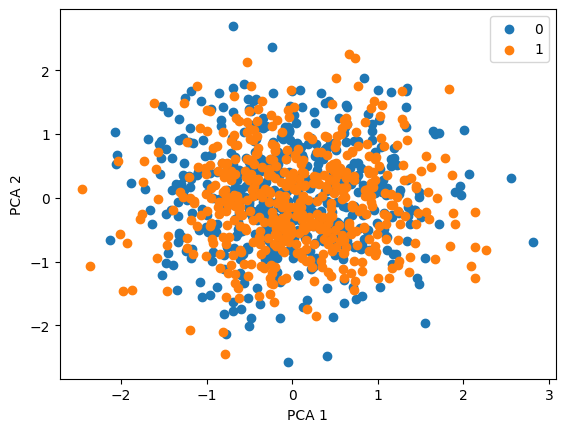

In [12]:
# Plot scatter plot againsts PCA components and highlight the labels with y = 0 and y = 1
plt.scatter(X_pca[y == 0][0], X_pca[y == 0][1], label='0')
plt.scatter(X_pca[y == 1][0], X_pca[y == 1][1], label='1')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()
